In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('SampleSuperstore.xls')

In [26]:
#Tratando os dados
df.head() #verificando os dados
df = df.drop(['Row ID', 'Postal Code'], axis=1)

In [27]:
df.info() #verificando se há valores nulos e os tipos de dados
df.duplicated().sum() #verificando se existem duplicatas
df.drop_duplicates(inplace=True) #removendo duplicatas
df.describe()  # Resumo estatístico, para detectar possíveis outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Region         9994 non-null   object        
 11  Product ID     9994 non-null   object        
 12  Category       9994 non-null   object        
 13  Sub-Category   9994 non-null   object        
 14  Product Name   9994 non-null   object        
 15  Sales          9994 n

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


<AxesSubplot:>

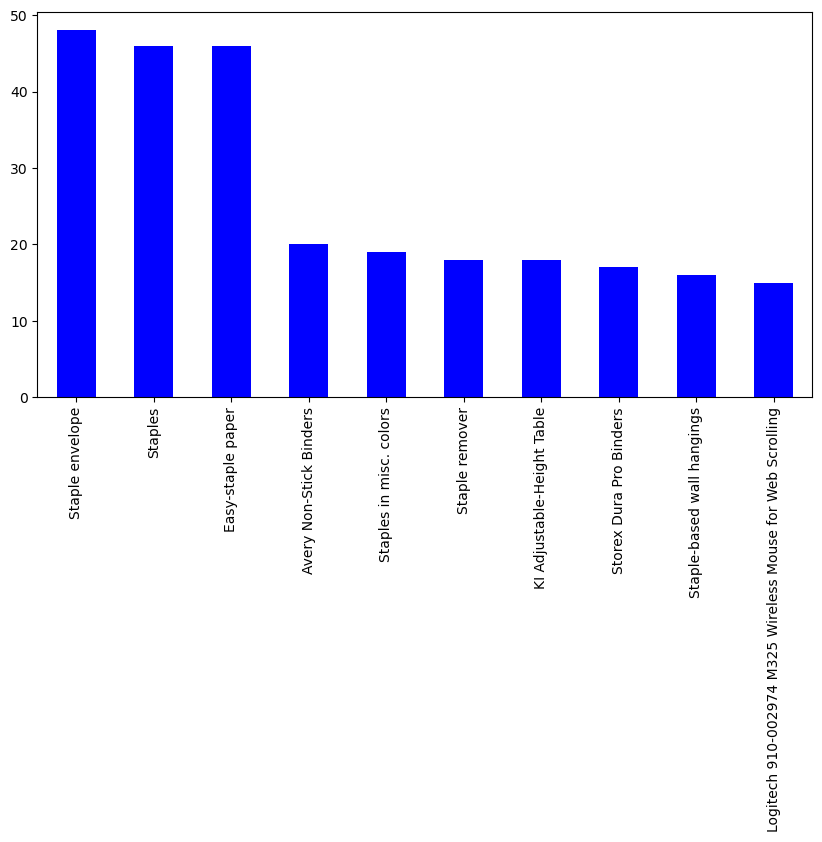

In [28]:
#analisando o produto mais vendido (Levando em consideração pessoas diferentes que compraram o mesmo produto)
df['Product Name'].value_counts().head(10).plot(kind='bar', figsize=(10,5), color='blue')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'KI Adjustable-Height Table'),
  Text(1, 0, 'Staple-based wall hangings'),
  Text(2, 0, 'Situations Contoured Folding Chairs, 4/Set'),
  Text(3, 0, 'Eldon Wave Desk Accessories'),
  Text(4, 0, 'Global High-Back Leather Tilter, Burgundy'),
  Text(5, 0, 'Staple envelope'),
  Text(6, 0, 'Easy-staple paper'),
  Text(7, 0, 'Staples'),
  Text(8, 0, 'Avery Non-Stick Binders'),
  Text(9, 0, 'Staples in misc. colors'),
  Text(10, 0, 'Logitech 910-002974 M325 Wireless Mouse for Web Scrolling'),
  Text(11, 0, 'Kingston Digital DataTraveler 16GB USB 2.0'),
  Text(12, 0, 'Logitech Desktop MK120 Mouse and keyboard Combo'),
  Text(13, 0, 'Geemarc AmpliPOWER60'),
  Text(14, 0, 'Maxell 4.7GB DVD-R')])

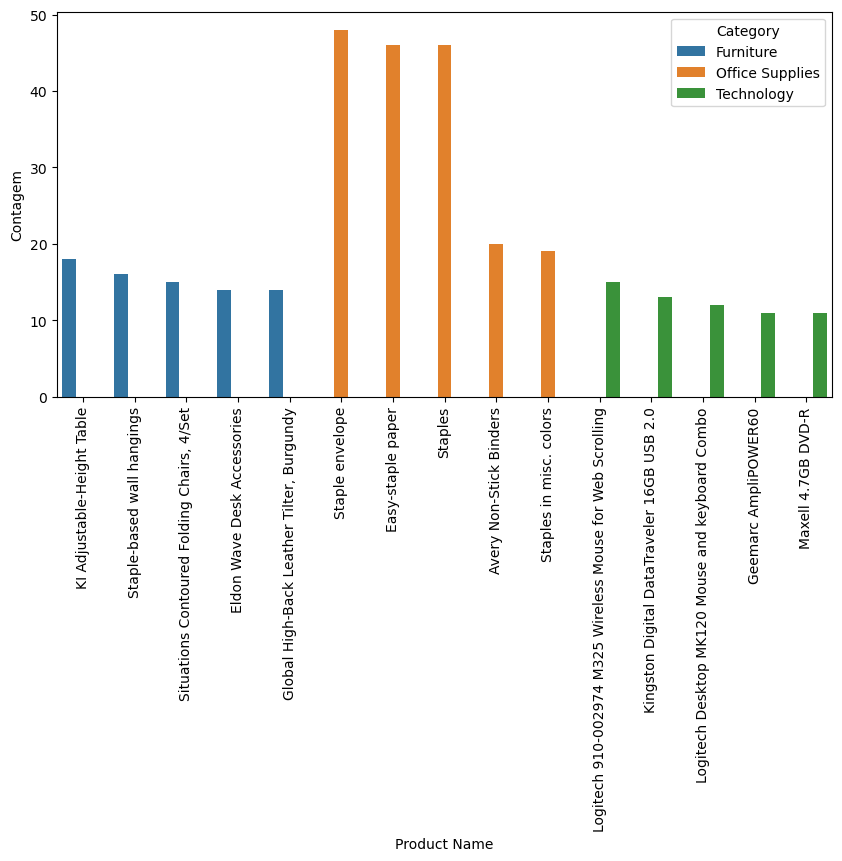

In [29]:
# analisando os produtos mais vendidos por categoria (Levando em consideração pessoas diferentes que compraram o mesmo produto)
tabelaaux = df.groupby('Category')['Product Name'].value_counts().groupby('Category').head(5).reset_index(name = 'Contagem')
plt.figure(figsize=(10,5))
sns.barplot(x='Product Name', y='Contagem', hue='Category', data=tabelaaux)
plt.xticks(rotation=90)



Análise de Desempenho por Categoria de Produto:

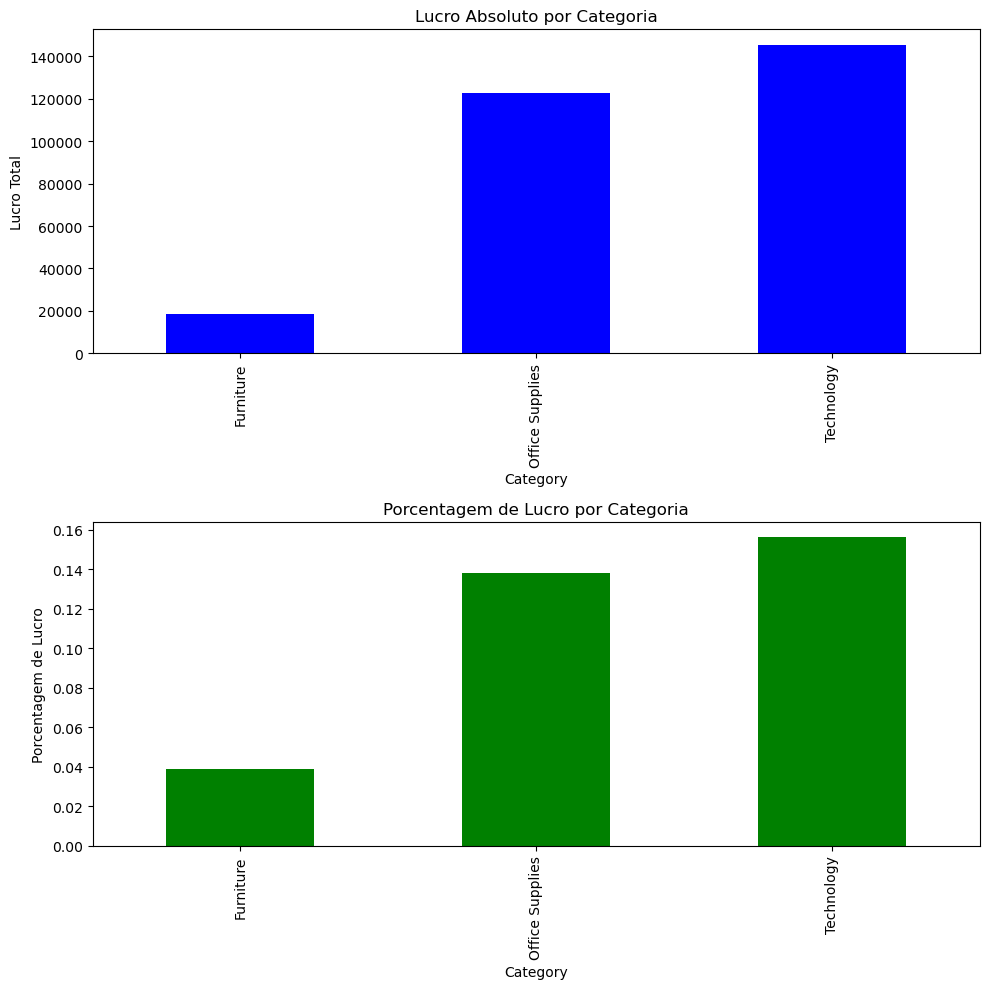

In [30]:
#Quais são as categorias de produtos que mais geram lucro? Quais geram menor lucro ou até prejuízo?

# Configurando a figura e os subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Gráfico 1: Lucro absoluto por categoria
df.groupby('Category')['Profit'].sum().sort_values().plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Lucro Absoluto por Categoria')
axes[0].set_ylabel('Lucro Total')

# Gráfico 2: Lucro percentual médio por categoria
df['Porcentagem'] = df['Profit'] / df['Sales']  # Calculando a porcentagem de lucro
df.groupby('Category')['Porcentagem'].mean().sort_values().plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Porcentagem de Lucro por Categoria')
axes[1].set_ylabel('Porcentagem de Lucro')

plt.tight_layout()
plt.show()

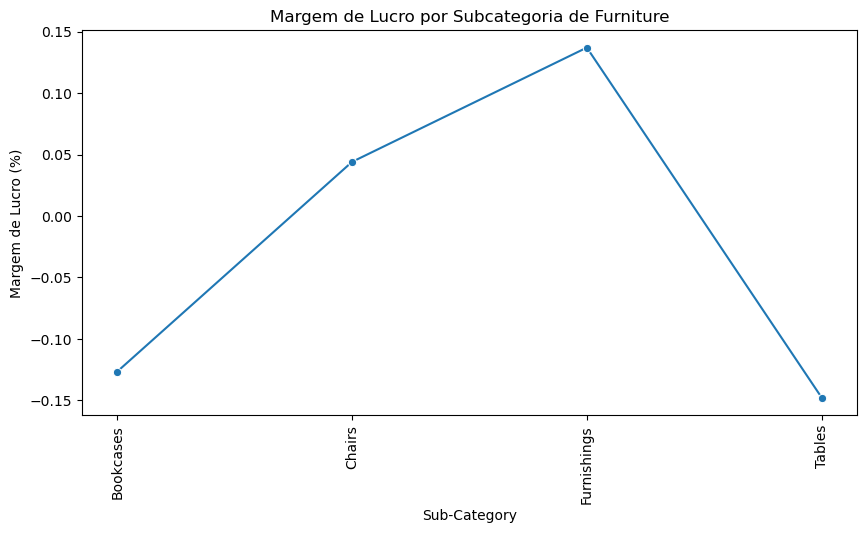

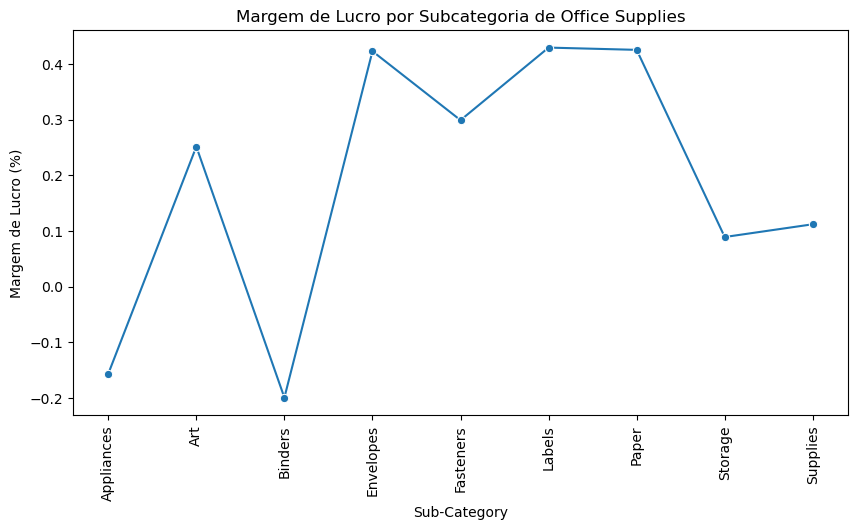

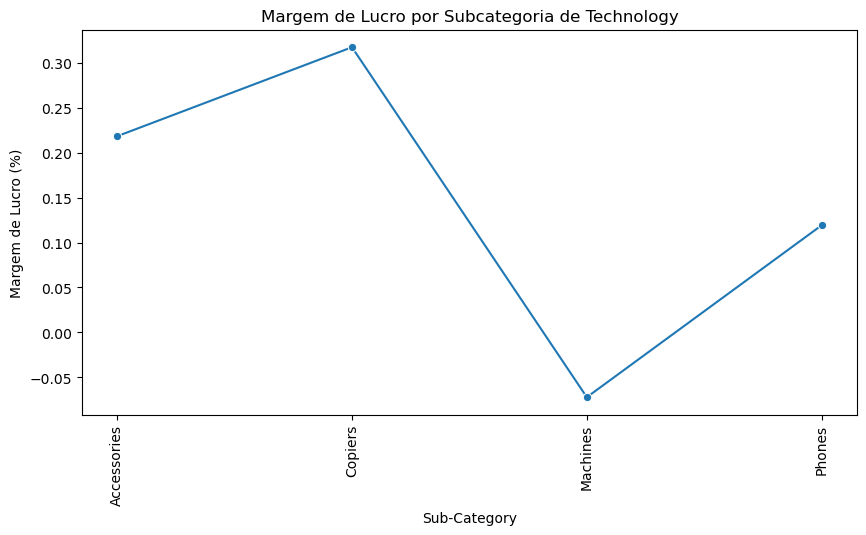

In [31]:
#Como a margem de lucro varia entre as subcategorias de cada categoria?
tabelaaux = df.groupby(['Category', 'Sub-Category'])['Porcentagem'].mean().reset_index()
categorias = df['Category'].unique()
for categoria in categorias:
    df_aux = tabelaaux[tabelaaux['Category'] == categoria]
    plt.figure(figsize=(10,5))
    sns.lineplot(x='Sub-Category', y='Porcentagem', data=df_aux, marker='o')
    plt.title(f'Margem de Lucro por Subcategoria de {categoria}')
    plt.ylabel('Margem de Lucro (%)')
    plt.xticks(rotation=90)
    plt.show()